------------------------------------------
## __ Ready for Assingment __
-  install [anaconda](https://www.anaconda.com/) or [miniconda](https://docs.conda.io/en/latest/miniconda.html)

-  create new environment and install [python](https://www.python.org/) with version 3.6.x

- install libraries in the environment and use the environment for this assignment
   - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
   - [pandas](http://pandas.pydata.org/), for data frames
   - [matplotlib](http://matplotlib.org/), for plotting
   - [folium](https://python-visualization.github.io/folium/quickstart.html#Getting-Started) and [plotly](https://plotly.com/python/plotly-express/#plotly-express) for plotting, visualizing
         
------------------------------------------

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)
from google.colab import drive
import math

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
confirmed_file = '/content/drive/MyDrive/HW3_dataset/confirmed.csv'
fatalities_file = '/content/drive/MyDrive/HW3_dataset/fatalities.csv'
metadata_file = '/content/drive/MyDrive/HW3_dataset/metadata.csv'
policy_file = '/content/drive/MyDrive/HW3_dataset/policy.csv'

In [ ]:
"""pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

"pd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\npd.set_option('display.max_colwidth', -1)"

## Problem1. Data Processing

### Problem 1-1 Load data file and check the data

1. Load dataframe (Python data structure) using <b>pandas library<b>
    - 'confirmed.csv': covid19 confirmed cases data
    - 'fatalities.csv': covid19 fatal cases data
    - 'metadata.csv': detail data for each country
    - 'policy.csv': policy data for each country

In [ ]:
###YOUR CODE HERE###
confirmed = pd.read_csv(confirmed_file)
fatalities = pd.read_csv(fatalities_file)
metadata = pd.read_csv(metadata_file)
policy = pd.read_csv(policy_file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



2. Check the data using 'shape' and 'head' and 'tail'

In [ ]:
# You can check whether data is correctly loaded in your df

In [ ]:
# checking confirmed
print(confirmed.shape)
print(confirmed.head())
print(confirmed.tail())

(285, 850)
  Province_State Country_Region       Lat       Long  200122  200123  200124  \
0            NaN    Afghanistan  33.93911  67.709953       0       0       0   
1            NaN        Albania  41.15330  20.168300       0       0       0   
2            NaN        Algeria  28.03390   1.659600       0       0       0   
3            NaN        Andorra  42.50630   1.521800       0       0       0   
4            NaN         Angola -11.20270  17.873900       0       0       0   

   200125  200126  200127  ...  220507  220508  220509  220510  220511  \
0       0       0       0  ...  178922  178981  179010  179017  179131   
1       0       0       0  ...  275341  275366  275372  275416  275440   
2       0       0       0  ...  265794  265798  265800  265804  265806   
3       0       0       0  ...   41717   41717   41717   41717   41717   
4       0       0       0  ...   99287   99287   99287   99287   99287   

   220512  220513  220514  220515  220516  
0  179169  179203  

In [ ]:
# checking fatalities
print(fatalities.shape)
print(fatalities.head())
print(fatalities.tail())

(285, 850)
  Province_State Country_Region       Lat       Long  200122  200123  200124  \
0            NaN    Afghanistan  33.93911  67.709953       0       0       0   
1            NaN        Albania  41.15330  20.168300       0       0       0   
2            NaN        Algeria  28.03390   1.659600       0       0       0   
3            NaN        Andorra  42.50630   1.521800       0       0       0   
4            NaN         Angola -11.20270  17.873900       0       0       0   

   200125  200126  200127  ...  220507  220508  220509  220510  220511  \
0       0       0       0  ...    7684    7684    7685    7685    7686   
1       0       0       0  ...    3496    3497    3497    3497    3497   
2       0       0       0  ...    6875    6875    6875    6875    6875   
3       0       0       0  ...     153     153     153     153     153   
4       0       0       0  ...    1900    1900    1900    1900    1900   

   220512  220513  220514  220515  220516  
0    7686    7686  

In [ ]:
# checking metadata
print(metadata.shape)
print(metadata.head())
print(metadata.tail())

(320, 8)
  Country_Region Province_State      lat      lon continent  population  \
0    Afghanistan            NaN  33.0000  65.0000      Asia    38041754   
1        Albania            NaN  41.1533  20.1683    Europe     2880917   
2        Algeria            NaN  28.0339   1.6596    Africa    43053054   
3        Andorra            NaN  42.5063   1.5218    Europe       77142   
4         Angola            NaN -11.2027  17.8739    Africa    31825295   

      area  density  
0   652230    58.33  
1    28748   100.21  
2  2381741    18.08  
3      468   164.83  
4  1246700    25.53  
         Country_Region Province_State      lat      lon continent  \
315  West Bank and Gaza            NaN  31.6000  34.8000      Asia   
316      Western Sahara            NaN  24.2155 -12.8858    Africa   
317               Yemen            NaN  15.5527  48.5164      Asia   
318              Zambia            NaN -15.4167  28.2833    Africa   
319            Zimbabwe            NaN -20.0000  30.0000  

In [ ]:
# checking policy
print(policy.shape)
print(policy.head())
print(policy.tail())

(293772, 61)
  CountryName CountryCode RegionName RegionCode Jurisdiction      Date  \
0       Aruba         ABW        NaN        NaN    NAT_TOTAL  20200101   
1       Aruba         ABW        NaN        NaN    NAT_TOTAL  20200102   
2       Aruba         ABW        NaN        NaN    NAT_TOTAL  20200103   
3       Aruba         ABW        NaN        NaN    NAT_TOTAL  20200104   
4       Aruba         ABW        NaN        NaN    NAT_TOTAL  20200105   

   C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  ...  \
0                0.0      NaN                   0.0      NaN  ...   
1                0.0      NaN                   0.0      NaN  ...   
2                0.0      NaN                   0.0      NaN  ...   
3                0.0      NaN                   0.0      NaN  ...   
4                0.0      NaN                   0.0      NaN  ...   

   StringencyIndex  StringencyIndexForDisplay  StringencyLegacyIndex  \
0              0.0                        0.0          

2. Check the number of blank in 'Province_State' column in the confirmed dataset and the fatalities dataset

In [ ]:
###YOUR CODE HERE###
confirmed.columns
print(confirmed['Province_State'].isna().sum())
print(fatalities['Province_State'].isna().sum())

196
196


3. Drop all columns except 'CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths' in the policy dataset and drop the rows containing blank in 'ConfirmedCases' or 'ConfirmedDeaths' columns

In [ ]:
###YOUR CODE HERE###
policy = policy[['CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
policy = policy.dropna(axis = 0, subset = ['ConfirmedCases', 'ConfirmedDeaths'])
display(policy)

,CountryName,Date,ConfirmedCases,ConfirmedDeaths
21,Aruba,20200122,0.0,0.0
22,Aruba,20200123,0.0,0.0
23,Aruba,20200124,0.0,0.0
24,Aruba,20200125,0.0,0.0
25,Aruba,20200126,0.0,0.0
...,...,...,...,...
293757,Zimbabwe,20220503,247990.0,5470.0
293758,Zimbabwe,20220504,248050.0,5471.0
293759,Zimbabwe,20220505,248050.0,5471.0
293760,Zimbabwe,20220506,248214.0,5473.0


### Problem 1-2 Data Cleaning

1. Fill blank to '' in 'Province_State' column of 'confirmed', 'fatalities', 'metadata' dataset using fillna

In [ ]:
###YOUR CODE HERE###
confirmed['Province_State'] = confirmed['Province_State'].fillna('')
fatalities['Province_State'] = fatalities['Province_State'].fillna('')
metadata['Province_State'] = metadata['Province_State'].fillna('')

2. Merge 'Country_Region' and 'Province_State' columns in the confirmed dataset and fatalities dataset, then drop some columns and print the two dataset like the result below 

In [ ]:
###YOUR CODE HERE###
confirmed["Country_Region"] = confirmed["Country_Region"] + '_' + confirmed["Province_State"]
fatalities["Country_Region"] = fatalities["Country_Region"] + '_' + fatalities["Province_State"]
confirmed.drop(['Province_State','Lat','Long'],axis = 1,inplace = True)
fatalities.drop(['Province_State','Lat','Long'],axis = 1,inplace = True)


In [ ]:
display(confirmed)

,Country_Region,200122,200123,200124,200125,200126,200127,200128,200129,200130,...,220507,220508,220509,220510,220511,220512,220513,220514,220515,220516
0,Afghanistan_,0,0,0,0,0,0,0,0,0,...,178922,178981,179010,179017,179131,179169,179203,179242,179267,179321
1,Albania_,0,0,0,0,0,0,0,0,0,...,275341,275366,275372,275416,275440,275485,275534,275574,275615,275621
2,Algeria_,0,0,0,0,0,0,0,0,0,...,265794,265798,265800,265804,265806,265808,265814,265816,265818,265823
3,Andorra_,0,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,42156,42156,42156,42156,42156
4,Angola_,0,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza_,0,0,0,0,0,0,0,0,0,...,657060,657060,657193,657193,657193,657193,657193,657193,657193,657329
281,Winter Olympics 2022_,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,Yemen_,0,0,0,0,0,0,0,0,0,...,11819,11819,11819,11819,11819,11819,11819,11819,11819,11819
283,Zambia_,0,0,0,0,0,0,0,0,0,...,320099,320099,320157,320226,320303,320412,320481,320591,320627,320680


In [ ]:
display(fatalities)

,Country_Region,200122,200123,200124,200125,200126,200127,200128,200129,200130,...,220507,220508,220509,220510,220511,220512,220513,220514,220515,220516
0,Afghanistan_,0,0,0,0,0,0,0,0,0,...,7684,7684,7685,7685,7686,7686,7686,7687,7690,7691
1,Albania_,0,0,0,0,0,0,0,0,0,...,3496,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,Algeria_,0,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,Andorra_,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola_,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza_,0,0,0,0,0,0,0,0,0,...,5657,5657,5657,5657,5657,5657,5657,5657,5657,5657
281,Winter Olympics 2022_,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,Yemen_,0,0,0,0,0,0,0,0,0,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
283,Zambia_,0,0,0,0,0,0,0,0,0,...,3982,3982,3982,3983,3983,3983,3983,3983,3983,3983


3. Count covid19 confirmed cases and fatalities cases for each date by each 'Country_Region' using concat

In [ ]:
###YOUR CODE HERE###
new_confirmed = pd.DataFrame(columns=['Country_Region','Date','ConfirmedCases'])
for name in confirmed['Country_Region']:
  row = confirmed.loc[confirmed['Country_Region'] == name]
  new_row = pd.melt(row,
        id_vars='Country_Region',
        value_vars=list(confirmed.columns[1:]),
        var_name='Date',
        value_name = 'ConfirmedCases')
  new_confirmed = pd.concat([new_confirmed,new_row],axis=0)   
display(new_confirmed)

,Country_Region,Date,ConfirmedCases
0,Afghanistan_,200122,0
1,Afghanistan_,200123,0
2,Afghanistan_,200124,0
3,Afghanistan_,200125,0
4,Afghanistan_,200126,0
...,...,...,...
841,Zimbabwe_,220512,248943
842,Zimbabwe_,220513,249131
843,Zimbabwe_,220514,249206
844,Zimbabwe_,220515,249206


In [ ]:
###YOUR CODE HERE###
new_fatalities = pd.DataFrame(columns=['Country_Region','Date','Fatalities'])
for name in fatalities['Country_Region']:
  row = fatalities.loc[fatalities['Country_Region'] == name]
  new_row = pd.melt(row,
        id_vars='Country_Region',
        value_vars=list(fatalities.columns[1:]),
        var_name='Date',
        value_name = 'Fatalities')
  new_fatalities = pd.concat([new_fatalities,new_row],axis=0)
display(new_fatalities)

,Country_Region,Date,Fatalities
0,Afghanistan_,200122,0
1,Afghanistan_,200123,0
2,Afghanistan_,200124,0
3,Afghanistan_,200125,0
4,Afghanistan_,200126,0
...,...,...,...
841,Zimbabwe_,220512,5481
842,Zimbabwe_,220513,5482
843,Zimbabwe_,220514,5482
844,Zimbabwe_,220515,5482


4. Merge the two dataset in 3. to variable <b>'covid'</b> and split the 'Country_Region' column into 'Country_Region' and 'Province_State' again like the result below

In [ ]:
###YOUR CODE HERE###
df = pd.merge(left = new_confirmed , right = new_fatalities, how = "inner")
df[['Country_Region','Province_State']]=df['Country_Region'].str.split('_',expand=True)
columns_titles = ["Country_Region","Province_State","Date","ConfirmedCases","Fatalities"]
df=df.reindex(columns=columns_titles)
display(df)

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,Afghanistan,,200122,0,0
1,Afghanistan,,200123,0,0
2,Afghanistan,,200124,0,0
3,Afghanistan,,200125,0,0
4,Afghanistan,,200126,0,0
...,...,...,...,...,...
241105,Zimbabwe,,220512,248943,5481
241106,Zimbabwe,,220513,249131,5482
241107,Zimbabwe,,220514,249206,5482
241108,Zimbabwe,,220515,249206,5482


### Problem 1-3 Data  Filtering
1. Filter rows with the most recent day of in the column 'Date' in <b>covid dataset</b>
- <b>Hint, Please refer to the following link below <b>
    - __https://pythonspot.com/pandas-filter/__

In [ ]:
###YOUR CODE HERE###
df['Date'] = df['Date'].apply(pd.to_numeric)
df_filtered = df.query('Date == 220516')
display(df_filtered)

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
845,Afghanistan,,220516,179321,7691
1691,Albania,,220516,275621,3497
2537,Algeria,,220516,265823,6875
3383,Andorra,,220516,42156,153
4229,Angola,,220516,99287,1900
...,...,...,...,...,...
237725,West Bank and Gaza,,220516,657329,5657
238571,Winter Olympics 2022,,220516,535,0
239417,Yemen,,220516,11819,2149
240263,Zambia,,220516,320680,3983


### Problem 1-4 Data  Grouping
1. Calculate sum of 'ConfirmedCases' and 'Fatalities'  by grouping Countrty_Region
- <b>Hint, Please refer to the following link below<b>
    - __https://pythonspot.com/pandas-groupby/__


In [ ]:
###YOUR CODE HERE###
df_grouped = df_filtered.groupby("Country_Region")[["ConfirmedCases",'Fatalities']].sum()
display(df_grouped)

,ConfirmedCases,Fatalities
Country_Region,,
Afghanistan,179321,7691
Albania,275621,3497
Algeria,265823,6875
Andorra,42156,153
Angola,99287,1900
...,...,...
West Bank and Gaza,657329,5657
Winter Olympics 2022,535,0
Yemen,11819,2149


In [ ]:
df_grouped.index.shape

(199,)

### Problem 1-5 Data Merging
1. Join the table from covid dataset with the metadata table
- __Condition 1 : Check the difference of 'Country_Region' between both datasets__
- __Condition 2 : in the meta dataset due to Province_State, there are many same Country_Region. We use only dataset which not contain province_State data__

In [ ]:
###YOUR CODE HERE###
print('meta data has more country')
print('metat data country :',metadata['Country_Region'].shape)
print('covid data set country :',df_grouped.index.shape)

meta data has more country
metat data country : (320,)
covid data set country : (199,)


In [ ]:
###YOUR CODE HERE###
tmp = metadata[metadata.Province_State == '']
result = pd.merge(df_grouped, tmp, how='left',on='Country_Region')
result = result.drop(['Province_State'], axis=1)
display(result)

,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
0,Afghanistan,179321,7691,33.0000,65.0000,Asia,38041754.0,652230.0,58.33
1,Albania,275621,3497,41.1533,20.1683,Europe,2880917.0,28748.0,100.21
2,Algeria,265823,6875,28.0339,1.6596,Africa,43053054.0,2381741.0,18.08
3,Andorra,42156,153,42.5063,1.5218,Europe,77142.0,468.0,164.83
4,Angola,99287,1900,-11.2027,17.8739,Africa,31825295.0,1246700.0,25.53
...,...,...,...,...,...,...,...,...,...
194,West Bank and Gaza,657329,5657,31.6000,34.8000,Asia,5190143.0,6020.0,862.15
195,Winter Olympics 2022,535,0,NaN,NaN,NaN,NaN,NaN,NaN
196,Yemen,11819,2149,15.5527,48.5164,Asia,28498683.0,527968.0,53.98
197,Zambia,320680,3983,-15.4167,28.2833,Africa,17861030.0,752612.0,23.73


# Problem2 Data Visualizing

## Problem 2-1  plot barchart of  top10 'ConfirmedCases' and 'Fatalities' in joined covid dataset

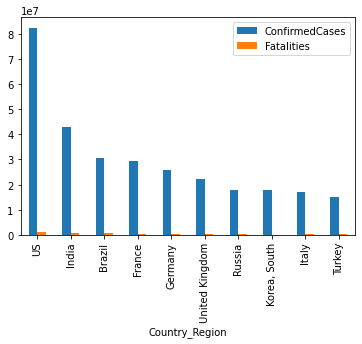

In [ ]:
###YOUR CODE HERE###
sorted_result = result.sort_values(by=['ConfirmedCases'],ascending=False)
top_10 = sorted_result.head(10)
top_10.plot(x='Country_Region', y=['ConfirmedCases','Fatalities'],kind='bar')


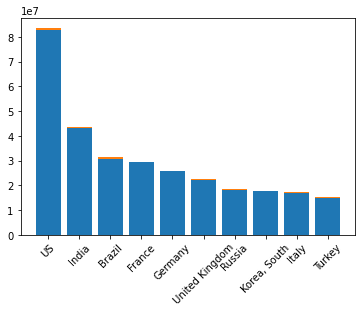

In [ ]:
###YOUR CODE HERE###

names = top_10['Country_Region']
confirmed = top_10['ConfirmedCases']
fatalities = top_10['Fatalities']

plt.bar(names, confirmed)
plt.bar(names, fatalities, bottom = confirmed)
plt.xticks(names, fontsize=10,rotation=45)

plt.show()

## Problem2-2  visualizing your data to express 'corona infection situation global map'
 <b> Hint. Refer to the website written at the beginning of the document.<b>

In [ ]:
###YOUR CODE HERE###
map = folium.Map()
lat = result['lat']
lon = result['lon']
country = result['Country_Region']
confirmed = result['ConfirmedCases']

for x,y,name,infection in zip(lat,lon,country,confirmed):
  if not math.isnan(x) and not math.isnan(y):
    folium.Circle(
        location = [x,y],
        popup= 'Country_Region : {} \n Confirmed Cases : {}'.format(name,infection),
        radius= float(max(infection /82613620	* 1000000 * 1.2 ,10000)),
        color="crimson",
        fill_color="crimson",
    ).add_to(map)
map


## Problem2-3  visualizing your data to express 'corona infection situation ' according to date

1. Visualize 'ConfirmedCases' trend plot of 'Australia', 'Japan', 'New Zealand', 'Singapore', 'South Korea' from the beginning and the end of policy dataset using iplot

 <b> Hint. Refer to the website written at the beginning of the document.<b>

In [ ]:
import cufflinks as cf
cf.go_offline(connected=True)

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
### Visualize each subplot for each country
# 나라만 가져오기
Australia = policy[policy['CountryName'] == 'Australia']
Japan = policy[policy['CountryName'] == 'Japan']
New_Zealand = policy[policy['CountryName'] == 'New Zealand']
Singapore = policy[policy['CountryName'] == 'Singapore']
South_Korea = policy[policy['CountryName'] == 'South Korea']

# 시간순서로 정렬하기
Australia=Australia.sort_values(by=['Date'])
Japan=Japan.sort_values(by=['Date'])
New_Zealand=New_Zealand.sort_values(by=['Date'])
Singapore=Singapore.sort_values(by=['Date'])
South_Korea=South_Korea.sort_values(by=['Date'])

# 포맷을 날자형식으로 변경
Australia['Date'] = pd.to_datetime(Australia['Date'], format='%Y%m%d')
Japan['Date'] = pd.to_datetime(Japan['Date'], format='%Y%m%d')
New_Zealand['Date'] = pd.to_datetime(New_Zealand['Date'], format='%Y%m%d')
Singapore['Date'] = pd.to_datetime(Singapore['Date'], format='%Y%m%d')
South_Korea['Date'] = pd.to_datetime(South_Korea['Date'], format='%Y%m%d')

# 나타내기
for country,name in zip([Australia,Japan,New_Zealand,Singapore,South_Korea],['Australia','Japan','New Zealand','Singapore','South Korea']):
  fig = px.line(country,x='Date',y='ConfirmedCases',title='confirmed cases in {}'.format(name))
  fig.show()

In [ ]:
### Visualize combined plot of five countries
combined = pd.concat([Australia,Japan,New_Zealand,Singapore,South_Korea])
fig = px.line(combined ,x='Date',y='ConfirmedCases',title='confirmed cases in 5 countries',color = 'CountryName')
fig.show()

## Problem2-4  visualizing your data to express 'corona infection situation ' according to other factor.

1. Scatter the population-ConfirmedCases log plot for each continents using plotly with the size of 'density' in the metadata

<b> Hint. Refer to the website written at the beginning of the document.<b>

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
from IPython.display import HTML

In [ ]:
###YOUR CODE HERE###
Asia = result[result['continent'] == 'Asia']
Europe = result[result['continent'] == 'Europe']
Africa = result[result['continent'] == 'Africa']
Americas = result[result['continent'] == 'Americas']
Oceania = result[result['continent'] == 'Oceania']

"""fig=px.scatter(result,x='population',y='ConfirmedCases',hover_name='density',log_x=True,log_y=True)
fig.show(renderer="colab")"""


for continent,name in zip([Asia,Europe,Africa,Americas,Oceania],['Asia','Europe','Africa','Americas','Oceania']):
  fig=px.scatter(continent,x='population',y='ConfirmedCases',hover_data=['density','Country_Region'],log_x=True,log_y=True, title='population - ConfirmedCases log plot for {}'.format(name))
  fig.show(renderer="colab")
